# Examen Data Science & AI

- Student: **VUL HIER JE NAAM IN**
- Studentennummer: **VUL HIER JE STUDENTENNUMMER IN**
- Datum: **EXAMENDATUM**
- Klasgroep: **VUL HIER JE KLASGROEP IN ZOALS IN DE EXAMENOPGAVE**


## Instructies

Bij een multiple-true-false vraag, geef je antwoorden als volgt (fictief voorbeeld):

1. Waar
2. Niet waar
3. Niet waar
4. Waar

Ook bij vragen met verschillende deelvragen gebruik je een genummerde lijst (hieronder een fictief voorbeeld). Merk op dat je LaTeX-notatie mag gebruiken voor wiskundige uitrdukkingen.

1. Een tweezijdige z-toets
2. $\overline{x} = 123.456$ (let op! getallen afronden tot 3 cijfers!)
3. $g = 112.432$
4. $p = 0.567$
5. We kunnen de nulhypothese ... (enz.). Er is dus ... (enz.)

**Verwijder vóór indienen a.u.b. alle niet gebruikte codeblokken, tekst tussen haakjes (Antwoord op vraag X) en deze instructies. Enkel jouw ingevulde antwoorden blijven over.**

In [2]:
# Package imports for data science
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

## Vraag 1

(antwoord op vraag 1)

# Vraag 1:

`Mijn antwoord op de vraag is B. `Dit omdat de waarden niet dicht bij regressielijn liggen. De waarden zijn verspreid over de gehele plot. Als de waarden op de lijn hadden gelegen dan zou de waarde -1 geweest zijn. De rechte daalt.

## Vraag 2

(a) Dit is `geen aselecte steekproef`. Niet iedereen heeft even veel kans om gekozen te worden in de steekproef. De mensen achteraan in de rij zullen nooit de kans krijgen om gekozen te worden.

(b) `Deze steekproefmethode is niet goed.`

(c)` Hier komt er een systematic sampling error voor`. Deze fout is gebaseerd op de gehele sample en niet het individu. Dit is ook geen accidental error want de steekproef is zodanig opgebouwd dat de allerlaatste mensen niet gekozen kunnen worden.

# Vraag 3

Uit een normaal verdeelde populatie met gemiddelde 250 en standaardafwijking 12 wordt eenaselecte steekproef genomen.

(a) Wat is de kans dat een waarneming kleiner is dan 230?

(b) Wat is de kans dat een waarneming groter is dan 220?

(c) Wat is de kans dat een waarneming tussen 245 en 275 ligt?

(d) Tussen welk interval, symmetrisch rond het gemiddelde, zal je 50% van de waarnemingen vinden?

In [6]:
m = 250
s = 12

# Vraag A
antwoordA = stats.norm.cdf(230, loc=m, scale=s)
print(f'{antwoordA}')

# Vraag B
antwoordB = stats.norm.sf(220, loc=m, scale=s)
print(f'{antwoordB}')

# Vraag C
antwoordC = stats.norm.cdf(275, loc=m, scale=s) - stats.norm.cdf(245, loc=m, scale=s)
print(f'{antwoordC}')

# Vraag D
lo = stats.norm.isf(1-0.25, loc=m, scale=s)
hi = stats.norm.isf(0.25, loc=m, scale=s)
print(f'Het interval waar je 50% van de waarnemingen zal vinden is: [{lo:.2f}, {hi:.2f}].')


0.0477903522728147
0.9937903346742238
0.6429284552994241
Het interval waar je 50% van de waarnemingen zal vinden is: [241.91, 258.09].


# Vraag 4

De hieronder gegeven steekproef is aselect getrokken uit een normale verdeling met $\mu$ = 12. Bereken een 80%-betrouwbaarheidsinterval voor het populatiegemiddelde.


In [14]:
df = pd.DataFrame(data={'Months': [15, 7,13,11,16,11,10, 6,11, 7,15,14, 7,11,11,10, 8, 9,10,13]})

m = 12
a = 0.2 / 2
s = df.Months.std()
n = df.Months.shape[0]

z = stats.t.isf(a, df=n-1)

lo = m - z * s / np.sqrt(n)
hi = m + z * s / np.sqrt(n)

print(f'Het betrouwbaarheidsinterval voor 80% van het populatiegemiddelde is [{lo},{hi}]')

Het betrouwbaarheidsinterval voor 80% van het populatiegemiddelde is [11.13375741763317,12.86624258236683]


# Vraag 5:

De steekproef die hieronder gegeven is, bevat meetresultaten van een variabele Temperatureop twee tijdstippen (time1entime2). We willen weten of de metingen op het tweede tijdstipsignificant verschillend zijn van die op het eerste tijdstip.

Gebruik een geschikte statistische toets (met significantieniveau 5%) om deze uitspraak teverifieeren

## Antwoord op vraag 5:

### A

Hier gebruik ik een T-test paired samples. Dit omdat we met twee variabelen zitten waarvan de afhankelijke variabele kwalitatief is en de onafhankelijke variabele kwantitatief. Paired samples gebruik je wanneer je bijvoorbeeld iemand laat fietsen met een mountainbike en met een racefiets (twee groepen). Independent samples gebruik je wanneer je iemand laat fietsen voor het gebruik van spierversterkende middelen en na het gebruik
hier vergelijk je de gemiddelden met elkaar.

### B 

$H0$: De meting op het tweede tijdstip is significant verschillend dan die op het eerste tijdstip.

$H1$: De meting op het tweede tijdstip is niet significant verschillend dan die op het eerste tijdstip.


### C

De P-waarde is 0.8744.

### D

...

### E

De interkwartielafstand is 16.5

De kurtosis is 0.16

Het bereik is 45

De $\sigma$ is 13.10

In [22]:
df = pd.DataFrame(data={'time1': [65, 87, 59, 71, 58, 74, 55, 98, 62, 53, 84, 63, 78, 62, 60],'time2': [82, 91, 86, 83, 85, 51, 65, 61, 76, 65, 53, 70, 51, 55, 68]})
a = 0.05
p = stats.ttest_rel(a=df.time2, b=df.time1, alternative='two-sided').pvalue

print(f'De P-waarde is {p:.4f}.')

if(p < a/2):
    print("p < a/2, dus H0 verwerpen")
else:
    print("p > a/2, dus H0 niet verwerpen")

De P-waarde is 0.8744.
p > a/2, dus H0 niet verwerpen


In [33]:
# interkwartielafstand
iqr = df.time1.quantile(0.75) - df.time1.quantile(0.25)

# kurtosis
kurt = df.time1.kurtosis()

# bereik
bereik = df.time1.max() - df.time1.min()

# standaardafwijking
s = df.time1.std()

print(f'De interkwartielafstand is {iqr}')
print(f'De kurtosis is {kurt:.2f}')
print(f'Het bereik is {bereik}')
print(f'De standaardafwijking is {s:.2f}')

De interkwartielafstand is 16.5
De kurtosis is 0.16
Het bereik is 45
De standaardafwijking is 13.10


# Vraag 6

## A

We gebruiken hier de goodness-of-fit Chi² test.

## B

$H0$ : $\mu1$ - $\mu2$ = 0

$H1$ : $\mu1$ - $\mu2$ < 0

## C

De $p$-waarde is ...

In [43]:
df = pd.DataFrame(data={'Choice': [
"Product A","Product A","Product B","Product B","Product C",
"Product B","Product B","Product B","Product C","Product B",
"Product C","Product A","Product C","Product B","Product C",
"Product B","Product C","Product C","Product C","Product B",
"Product C","Product C","Product B","Product C","Product B",
"Product B","Product B","Product B","Product A","Product B",
"Product B","Product B","Product B","Product B","Product C",
"Product C","Product B","Product C","Product C","Product A",
"Product C","Product C","Product B","Product B","Product B",
"Product B","Product C","Product C","Product C","Product C",
"Product C","Product B","Product A","Product C","Product C",
"Product B","Product B","Product C","Product C","Product C",
"Product B","Product C","Product B","Product B","Product C",
"Product B","Product B","Product C","Product C","Product B",
"Product C","Product C","Product C","Product B","Product B",
"Product C","Product C","Product C","Product C","Product C",
"Product C","Product C","Product C","Product C","Product C",
"Product C","Product C","Product C","Product C","Product B"
]})

observed = df.Choice.value_counts()
expected_p = np.array([1/3 ,1/3,1/3])

alpha = 0.05               # Significance level
n = sum(observed)          # Sample size
k = len(observed)          # Number of categories
dof = k - 1                # Degrees of freedom
expected = expected_p * n  # Expected absolute frequencies in the sample
g = stats.chi2.isf(alpha, df=dof)  # Critical value

# Goodness-of-fit-test in Python:
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Significance level  ⍺ = %.2f" % alpha)
print("Sample size         n = %d" % n)
print("k = %d; df = %d" % (k, dof))
print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p)

Significance level  ⍺ = 0.05
Sample size         n = 90
k = 3; df = 2
Chi-squared        χ² = 31.2000
Critical value      g = 5.9915
p-value             p = 0.0000


# Vraag 7

## A

De richtingscoëfficient is 0.02321


## B

Het snijpunt is 427.433

## C

De correlatiecoëfficient $R$ is 0.0416. De waarde ligt zeer dicht tegen nul wat betekent dat er weinig samenhang is tussen de twee variabelen `x` en `y`.

## D

De determinatiecoëfficient $R²$ is 0.0017. Deze waarde is een absoluut getal dat het percentage geeft. Het percentage hier duidt aan dat er bijna geen enkel verband is tussen de twee variabelen `x` en `y`.

In [57]:
df = pd.DataFrame(data={'x': [394, 369, 393, 442, 371, 416, 477, 406, 422, 459,410, 433, 365, 454, 373, 400, 354, 422, 399, 365,367, 428, 423, 336, 400, 425, 429, 413, 395, 474,405, 410, 383, 359, 429, 372, 331, 476, 395, 339,417, 347, 414, 444, 390, 389, 467, 386, 371, 367,378, 447, 432, 382, 339, 341, 401, 430, 386, 413,435, 414, 433, 435, 362, 356, 386, 322, 455, 384,321, 416, 390, 411, 397, 483, 405, 367, 367, 406,394, 424, 389, 333, 442, 422, 381, 450, 390, 392,368, 381, 406, 337, 419, 397, 427, 368, 501, 435],'y': [461, 427, 468, 426, 418, 463, 441, 461, 436, 439,444, 425, 395, 426, 425, 443, 420, 442, 471, 455,432, 419, 438, 411, 468, 439, 424, 462, 405, 462,407, 435, 422, 450, 436, 450, 440, 418, 426, 423,426, 422, 414, 408, 442, 434, 454, 441, 406, 396,497, 394, 435, 460, 461, 451, 422, 432, 438, 449,410, 426, 435, 460, 452, 475, 426, 437, 469, 444,444, 439, 446, 461, 448, 474, 432, 412, 449, 430,433, 423, 449, 429, 386, 480, 422, 464, 397, 407,409, 455, 461, 431, 420, 445, 424, 453, 432, 449]})

from sklearn.linear_model import LinearRegression

X = df.x.values.reshape(-1,1)
Y = df.y

weight_model = LinearRegression().fit(X,Y)

snijpunt = weight_model.intercept_
rico = weight_model.coef_[0]

corr = np.corrcoef(df.x, df.y)[0][1]
corr2 = corr**2

print(f'De richtingscoëfficient is {rico:.5f}')
print(f'Het snijpunt is {snijpunt:.3f}')

print(f'De correlatiecoëfficient R is {corr:.4f}')
print(f'De determinatiecoëfficient R² is {corr2:.4f}')


De richtingscoëfficient is 0.02321
Het snijpunt is 427.433
De correlatiecoëfficient R is 0.0416
De determinatiecoëfficient R² is 0.0017


<AxesSubplot:xlabel='x', ylabel='y'>

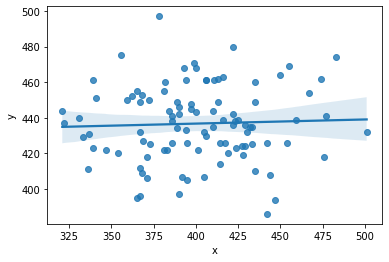

In [56]:
sns.regplot(data=df, x='x', y='y')

# Vraag 8

## A

Paars: `Eenvoudig voortschrijdend gemiddelde met periode 12`

Cyaan:  `Enkelvoudige expontentiële afvlakking met `$\sigma$ `= 0.1`

Rood: `Eenvoudig voortschrijdend gemiddelde met periode 3`

## B

`Mijn definitief antwoord is B.`

Er is hier een stijgende trend op te merken. In Juli merk ik op beide drie jaren een sterke daling die nadien dan weer fors stijgt. Dit zou een seizoenale periode kunnen betekenen, maar dit is een uitzondering op de gehele grafiek. Vandaar komt dit het meest overeen met dubbele exponenti ̈ele afvlakking. 

In het geval dat er wél een sterke seizoenale overeenkomst was, was er hier sprake van een driedubbele exponentiële afvlakking met multiplicatie. Dit omdat de grafiek uitwaaiert.